# Streaming tweets

Demonstrativo de como criar um objeto stream e filtrar seu conteúdo com base em algumas palavras chave. A autenticação necessita de login feito no Twitter, o que não será feito neste caso. Além disso, é necessário importar o pacote tweepy.

```python
import tweepy
# Store credentials in relevant variables
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"

# Create your Stream object with credentials
stream = tweepy.Stream(consumer_key, consumer_secret, access_token, access_token_secret)

# Filter your Stream variable
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])
```

# Carregar e explorar os dados do Twitter

A partir do procedimento acima, podemos gerar um arquivo .txt com o conteúdo extraído do Twitter, que será agora carregado em uma lista. 

In [2]:
# importando biblioteca json
import json

# string com o caminho do arquivo tweets.txt
tweets_data_path = 'tweets.txt'

# inicializando uma lista vazia para armazenar os tweets
tweets_data = []

# abrindo conexão com o arquivo
tweets_file = open(tweets_data_path, "r")

# laço que lê o arquivo txt e popula a lista
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# fechando a conexão com o arquivo
tweets_file.close()

# imprimindo as chaves do primeiro dicionário de tweet
print(tweets_data[0].keys())


dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


# Dados do Twitter em um Dataframe

A etapa realizada anteriormente gerou uma lista de dicionários em que cada dicionário corresponde a um tweet. Agora serão salvas em um dataframe as informações correspondentes ao texto e idioma de um tweet, nas colunas _text_ e _lang_ respectivamente: 


In [3]:
# importando Pandas
import pandas as pd

# criando o dataframe de text e idioma dos tweets
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# imprimindo o head do dataframe
print(df.head())


                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


# Um pouco mais sobre análise de texto do Twitter

Com base no dataframe gerado, será feita uma contagem dos tweets que contenham as palavras 'clinton', 'trump', 'sanders' e 'cruz'.

In [4]:
import re
# função que retorna a presença/ausência da palavra procurada( primeiro argumento ) no texto ( segundo argumento )
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

# inicializando a lista de contagem
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# laço em que é feita a contagem de ocorrências de cada palavra procurada, sendo feita a chamada da função word_in_text
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


# Plotando o resultado da contagem

Com base na contagem feita na etapa anterior será plotado um gráfico de barras representando o número de ocorrência de cada palavra definida na busca.

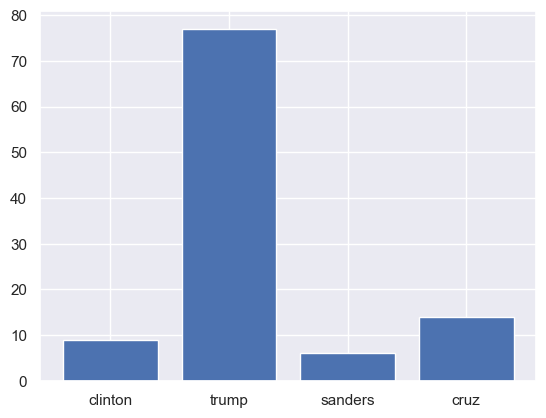

In [20]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# utilizando  estilo seaborn
sns.set(color_codes=True)

# criando uma lista com label do eixo x
cd = ['clinton', 'trump', 'sanders', 'cruz']

# plotando o gráfico de barras
plt.bar(cd, [clinton, trump, sanders, cruz])
plt.show()